**Syntax: Creating DataFrames**<br>
**Specify values for each column:**

In [ ]:
import pandas as pd
df = pd.DataFrame(
{"a" : [4 ,5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = [1, 2, 3])

**Specify values for each row:**

In [ ]:
df = pd.DataFrame(
[[4, 7, 10],
[5, 8, 11],
[6, 9, 12]],
index=[1, 2, 3],
columns=['a', 'b', 'c'])

**Create DataFrame with a MultiIndex:**

In [ ]:
df = pd.DataFrame(
{"a" : [4 ,5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = pd.MultiIndex.from_tuples(
[('d',1),('d',2),('e',2)],
names=['n','v']))

**Reshaping Data: Change the layout of a data set:**

In [ ]:
#Gather columns into rows.
pd.melt(df)

In [ ]:
#Append columns of DataFrames
#pd.concat([df1,df2], axis=1)

In [ ]:
#Order rows by values of a column (high to low).
#df.sort_values('mpg',ascending=False)

In [ ]:
#Rename the columns of a DataFrame
df.rename(columns = {'y':'year'})

In [ ]:
#Sort the index of a DataFrame
df.sort_index()

In [ ]:
#Reset index of DataFrame to row numbers, moving index to columns.
df.reset_index()

**Subset Observations (Rows)**

In [ ]:
#Extract rows that meet logical criteria
df[df.Length > 7]

In [ ]:
#Remove duplicate rows (only considers columns).
df.drop_duplicates()

In [ ]:
# Select first n rows
df.head(n)

In [ ]:
# Select last n rows.
df.tail(n)

In [ ]:
# Randomly select fraction of rows.
df.sample(frac=0.5) 

In [ ]:
# Randomly select n rows.
df.sample(n=10)

In [ ]:
# Select rows by position.
df.iloc[10:20]

In [ ]:
Select and order top n entries.
df.nlargest(n, 'value')

In [ ]:
# Select and order bottom n entries.
df.nsmallest(n, 'value')

**Subset Variables (Columns)**

In [ ]:
# Select multiple columns with specific names.
df[['width','length','species']]

In [ ]:
# Select single column with specific name.
df['width'] or df.width

In [ ]:
# Select columns whose name matches regular expression regex.
df.filter(regex='regex')

**regex (Regular Expressions) Examples**

In [ ]:
'\.' - Matches strings containing a period '.'

In [ ]:
'Length$' - Matches strings ending with word 'Length'

In [ ]:
'^Sepal' - Matches strings beginning with the word 'Sepal'

In [ ]:
'^x[1-5]$' - Matches strings beginning with 'x' and ending with 1,2,3,4,5

In [ ]:
'^(?!Species$).*' - Matches strings except the string 'Species'

In [ ]:
# Select all columns between x2 and x4 (inclusive).
df.loc[:,'x2':'x4']

In [ ]:
# Select columns in positions 1, 2 and 5 (first column is 0).
df.iloc[:,[1,2,5]]

In [ ]:
# Select rows meeting logical condition, and only the specific columns.
df.loc[df['a'] > 10, ['a','c']]

**Handling Missing Data**

In [ ]:
# Drop rows with any column having NA/null data.
df.dropna()

In [ ]:
# Replace all NA/null data with value.
df.fillna(value)

**Make New Columns**

In [ ]:
# Compute and append one or more new columns
df.assign(Area=lambda df: df.Length*df.Height)

In [ ]:
# Add single column.
df['Volume'] = df.Length*df.Height*df.Depth

In [ ]:
# Bin column into n buckets.
pd.qcut(df.col, n, labels=False)

**pandas provides a large set of vector functions that operate on all<br>
columns of a DataFrame or a single selected column (a pandas<br>
Series). These functions produce vectors of values for each of the<br>
columns, or a single Series for the individual Series. Examples:**

In [ ]:
# Element-wise max.
max(axis=1)

In [ ]:
# Trim values at input thresholds
clip(lower=-10,upper=10)

In [ ]:
min(axis=1)
Element-wise min

In [ ]:
abs()
Absolute value.

**Combine Data Sets**<br>
**Standard Joins**

In [ ]:
# Join matching rows from bdf to adf.
pd.merge(adf, bdf,
    how='left', on='x1')

In [ ]:
# Join matching rows from adf to bdf.
pd.merge(adf, bdf,
    how='right', on='x1')

In [ ]:
# Join data. Retain only rows in both sets.
pd.merge(adf, bdf,
how='inner', on='x1')

In [ ]:
# Join data. Retain all values, all rows.
pd.merge(adf, bdf,
how='outer', on='x1')

**Filtering Joins**

In [ ]:
# All rows in adf that have a match in bdf.
adf[adf.x1.isin(bdf.x1)]

**Set-like Operations**

In [ ]:
# Rows that appear in both ydf and zdf (Intersection).
pd.merge(ydf, zdf)

In [ ]:
# Rows that appear in either or both ydf and zdf (Union).
pd.merge(ydf, zdf, how='outer')

In [ ]:
# Rows that appear in ydf but not zdf (Setdiff).
pd.merge(ydf, zdf, how='outer',
indicator=True)
.query('_merge == "left_only"')
.drop(columns=['_merge'])

**Group Data**

In [ ]:
# Return a GroupBy object, grouped by values in column named "col".
df.groupby(by="col")

In [ ]:
# Return a GroupBy object, grouped by values in index level named "ind".
df.groupby(level="ind")

All of the summary functions listed above can be applied to a group.
Additional GroupBy functions:

In [ ]:
# Size of each group.
size()

In [ ]:
# Aggregate group using function.
agg(function)

The examples below can also be applied to groups.

In [ ]:
# Copy with values shifted by 1.
shift(1)

In [ ]:
# Ranks with no gaps
rank(method='dense')

In [ ]:
# Ranks. Ties get min rank.
rank(method='min')

In [ ]:
# Ranks rescaled to interval [0, 1].
rank(pct=True)

In [ ]:
# Ranks. Ties go to first value.
rank(method='first')

In [ ]:
# Copy with values lagged by 1. #
shift(-1)

In [ ]:
# Cumulative sum.
cumsum()

In [ ]:
# Cumulative max.
cummax()

In [ ]:
# Cumulative min.
cummin()

In [ ]:
# Cumulative product
cumprod()

**Windows**

In [ ]:
# Return an Expanding object allowing summary functions to be applied cumulatively
df.expanding()

In [ ]:
# Return a Rolling object allowing summary functions to be applied to windows of length n.
df.rolling(n)

**Plotting**

    X   Y   Z
0  78  84  86
1  85  94  97
2  96  89  96
3  80  83  72
4  86  86  83


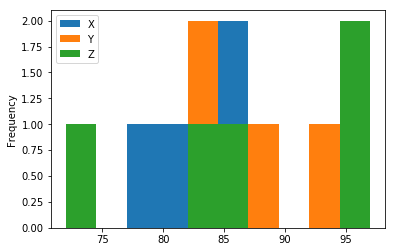

In [2]:
import matplotlib as plot
import pandas as pd
df = pd.DataFrame({'X':[78,85,96,80,86], 'Y':[84,94,89,83,86],'Z':[86,97,96,72,83]});
print(df)
df.plot.hist() # Histogram for each column

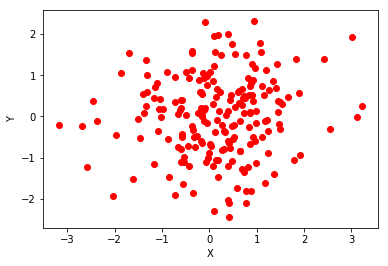

In [3]:
 # Scatter chart using pairs of points
import matplotlib.pyplot as plt
from pylab import randn
X = randn(200)
Y = randn(200)
plt.scatter(X,Y, color='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
